In [31]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<h3>Loading images

In [32]:
image_names= os.listdir('./Data_ML/image_chips/')
image_names[:5]#visualising top 5 image names

['H166.jpg', 'L704.jpg', 'H006.jpg', 'J189.jpg', 'J638.jpg']

In [4]:
from PIL import Image
im = Image.open(os.path.join(os.getcwd(),'Data_ML','image_chips',image_names[1]))
print(im)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=750x750 at 0x107EED8B0>


<h3>Visualising the image

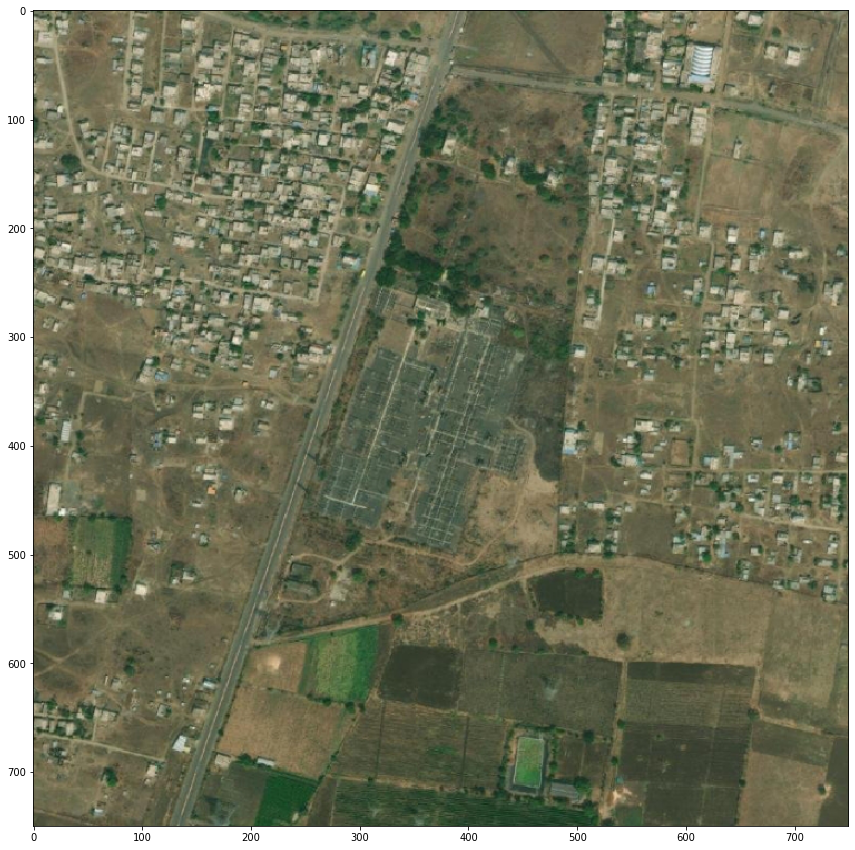

In [33]:
root = os.getcwd() #getting current working directory
idx = 0 #change idx to visualise different images from the image_names list
name = image_names[idx]
image_path = os.path.join(root,'Data_ML','image_chips',name)
img = plt.imread(image_path)
plt.imshow(img)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

<h3>Loading mask

In [34]:
mask_name = name[:-4] + '.csv' #removing .jpg from the name and adding .csv for reading mask
mask_path = os.path.join(root,'Data_ML','target_feature_AOI',mask_name)
mask_data = pd.read_csv(mask_path)
coordinates = mask_data.WKT.values[0][16:-3].split(',')

x = []
y = []

for c in coordinates:
    x.append(float(c.split(' ')[0]))
    y.append(float(c.split(' ')[1]))

x = np.array(x)
y = np.array(y)

(562500,)
tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]])


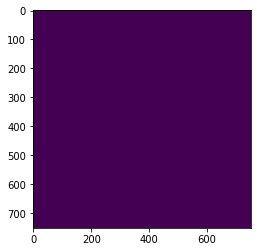

In [54]:
### Not working!! Need to fix else main notebook for UNet also doesn't work

from matplotlib.path import Path
points = ([tuple(float(i) for i in x.split()) for x in coordinates])
h , w = 750, 750
point_path = Path(points)
x, y = np.mgrid[:h, :w]
coors=np.hstack((x.reshape(-1, 1), y.reshape(-1,1)))
masked_image = point_path.contains_points(coors)
plt.imshow(masked_image.reshape(h, w))
plt.show()

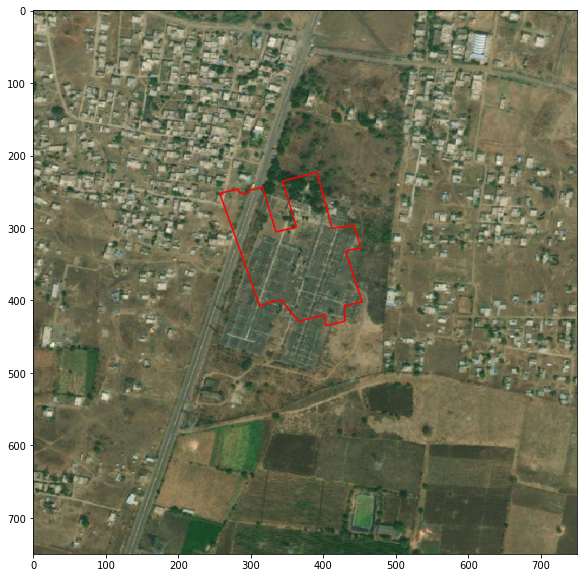

In [39]:
plt.imshow(img)
plt.plot(x,y+720,c='r')# plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()